In [1]:
%matplotlib notebook

In [2]:
from utils import *
import time
import itertools
import numpy as np

### Ciąg Fibonacciego

Ciąg Fibonacciego jest jednym z najbardziej znanych ciągów w matematyce. Jest on zdefiniowany rekurencyjnie w następujący sposób:


$$
F(n) = 
\begin{cases} 
0 & \text{jeśli } n = 0, \\
1 & \text{jeśli } n = 1, \\
F(n-1) + F(n-2) & \text{w pozostałych przypadkach}.
\end{cases}
$$

#### Pierwsze 10 wyrazów

Pierwsze 10 wyrazów tego ciągu to:


1. $$ F(0) = 0 $$
2. $$ F(1) = 1$$ 
3. $$ F(2) = 1$$ 
4. $$ F(3) = 2$$ 
5. $$ F(4) = 3$$ 
6. $$ F(5) = 5$$ 
7. $$ F(6) = 8$$ 
8. $$ F(7) = 13$$ 
9. $$ F(8) = 21$$ 
10. $$ F(9) = 34$$


In [12]:
def fib_rec(n):
    
    if n == 1:
        return 1
    if n == 2:
        return 1
    
    return fib_rec(n-1) + fib_rec(n-2)

In [15]:
def fib_dp(n):
    
    dp = np.ones(n, dtype=int) # tablica jedynek o długości n
    
    for i in range(2, n): # pętla od 2 .. n-1, w pythonie drugi indeks jest ekskluzywny - nie bierzemy go pod uwagę
        dp[i] = dp[i-1] + dp[i-2]
    
    return dp[-1] # zwracamy ostatni element, możemy też zwrócić całą tablicę

In [16]:
fib_rec(10), fib_dp(10)

(55, 55)

### Problem Znajdowania Podciągu o Maksymalnej Sumie

Problem znajdowania podciągu o maksymalnej sumie (ang. Maximum Subarray Problem) jest dobrze znanym problemem w informatyce i analizie algorytmów. Zadanie polega na znalezieniu ciągłego podciągu w danym ciągu liczb, który ma największą sumę.

#### Formalna Definicja

Dany jest ciąg $$ A = [a_1, a_2, \ldots, a_n] $$
Należy znaleźć taki ciągły podciąg $$A[i:j]$$ gdzie $$0 \leq i \leq j < n $$ że jego suma elementów jest największa spośród wszystkich możliwych podciągów. Oznaczmy tę maksymalną sumę jako **S**.

$$
S = \max_{0 \leq i \leq j < n} \sum_{k=i}^{j} a_k
$$

#### Algorytmy Rozwiązujące Problem

1. Algorytm Brute-Force: Sprawdzenie wszystkich możliwych podciągów (czasochłonne).
2. Algorytm Kadane'a: Efektywniejszy algorytm działający w czasie liniowym \( O(n) \).

In [41]:
def max_sum_subarray(array):
    
    ix_best_start = 0
    ix_best_end = 0
    ix_current_start = 0
    cur_sum = 0
    best_sum = array[0]
    
    for i in range(0, len(array)):
        
        cur_sum += array[i]
        
        if cur_sum > best_sum:
            best_sum = cur_sum
            ix_best_start = ix_current_start
            ix_best_end = i
            
        if cur_sum < 0:
            cur_sum = 0
            ix_current_start = i + 1
            
    return ix_best_start, ix_best_end, best_sum
    

In [42]:
ar1 = np.array([-3, 2, 4, -1, -6, 5])

In [43]:
max_sum_subarray(ar1)

(1, 2, 6)

<IPython.core.display.Javascript object>


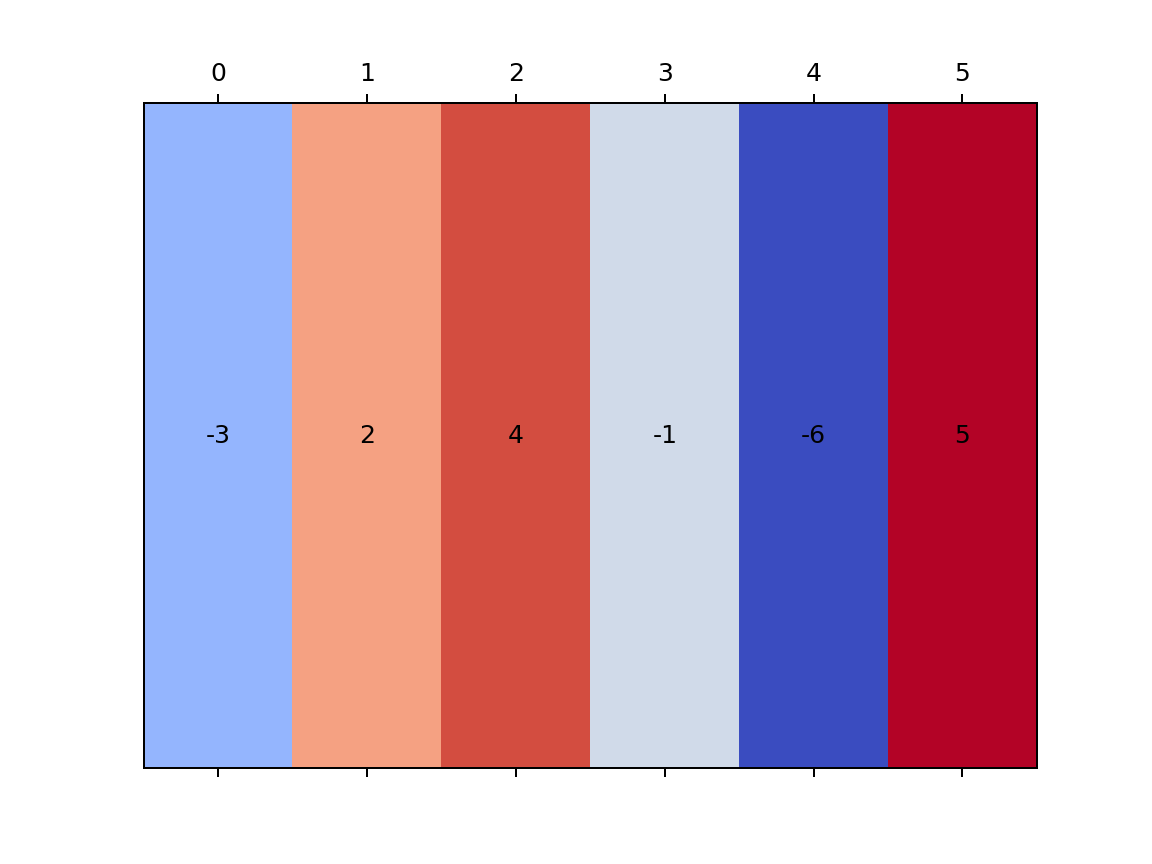

In [44]:
InteractiveArray(ar1)

### Problem Znajdowania Podmacierzy o Maksymalnej Sumie

Problem znajdowania podmacierzy o maksymalnej sumie jest rozwinięciem problemu znajdowania podciągu o maksymalnej sumie do dwuwymiarowych struktur danych, takich jak macierze. Zadanie polega na znalezieniu takiej podmacierzy w danej macierzy **M**, że suma jej elementów jest największa.

#### Formalna Definicja

Dana jest macierz **M** o wymiarach $n \times m$. Celem jest znalezienie takiej podmacierzy $M[i_1:j_1, i_2:j_2]$ (gdzie $0 \leq i_1 \leq j_1 < n $ i $ 0 \leq i_2 \leq j_2 < m $), że suma jej elementów **S** jest największa spośród wszystkich możliwych podmacierzy.

$$
S = \max_{\substack{0 \leq i_1 \leq j_1 < n \\ 0 \leq i_2 \leq j_2 < m}} \sum_{a=i_1}^{j_1} \sum_{b=i_2}^{j_2} M[a, b]
$$

#### Algorytmy Rozwiązujące Problem

1. Algorytm Brute-Force: Sprawdzenie wszystkich możliwych podmacierzy (bardzo czasochłonne).
2. Algorytm Dynamiczny: Efektywniejszy algorytm działający w czasie $O(n^3)$ lub $O(n^4)$ w zależności od implementacji.

In [51]:
def max_sum_submatrix(matrix):
    
    rows, cols = matrix.shape
    
    # transformujemy macierz w macierz pomocniczą przechowującą narastającą sumę poruszając się w dół po macierzy
    # (https://www.wikiwand.com/pl/RLE)
    for i in range(1, rows):
        for j in range(0, cols):
            matrix[i, j] += matrix[i-1, j]
            
    max_sum = float('-inf')
    max_coords = (0, 0, 0, 0)
    
    for r1, r2 in itertools.combinations(range(0, rows), 2): # generujemy wszystkie kombinacje par wiersz1-wiersz2
        
        if r1 > 0:
            row_sum = matrix[r2, :] - matrix[r1 - 1, :]
        else:
            row_sum = matrix[r2, :]
            
        c1, c2, subarray_max_sum = max_sum_subarray(row_sum) # wyliczamy podmacierz od największej sumie dla tej konkretnej pary wierszy
        
        if subarray_max_sum > max_sum:
            max_sum = subarray_max_sum
            max_coords = (r1, c1, r2, c2)
            
    return max_coords, max_sum
    

In [52]:
# Example usage
test_matrix = np.array([
    [1, 2, -1, -4, -20],
    [-8, -3, 4, 2, 1],
    [3, 8, 10, 1, 3],
    [-4, -1, 1, 7, -6]
])

max_coords, max_sum = max_sum_submatrix(test_matrix)
max_coords, max_sum

((1, 1, 3, 3), 29)

<IPython.core.display.Javascript object>


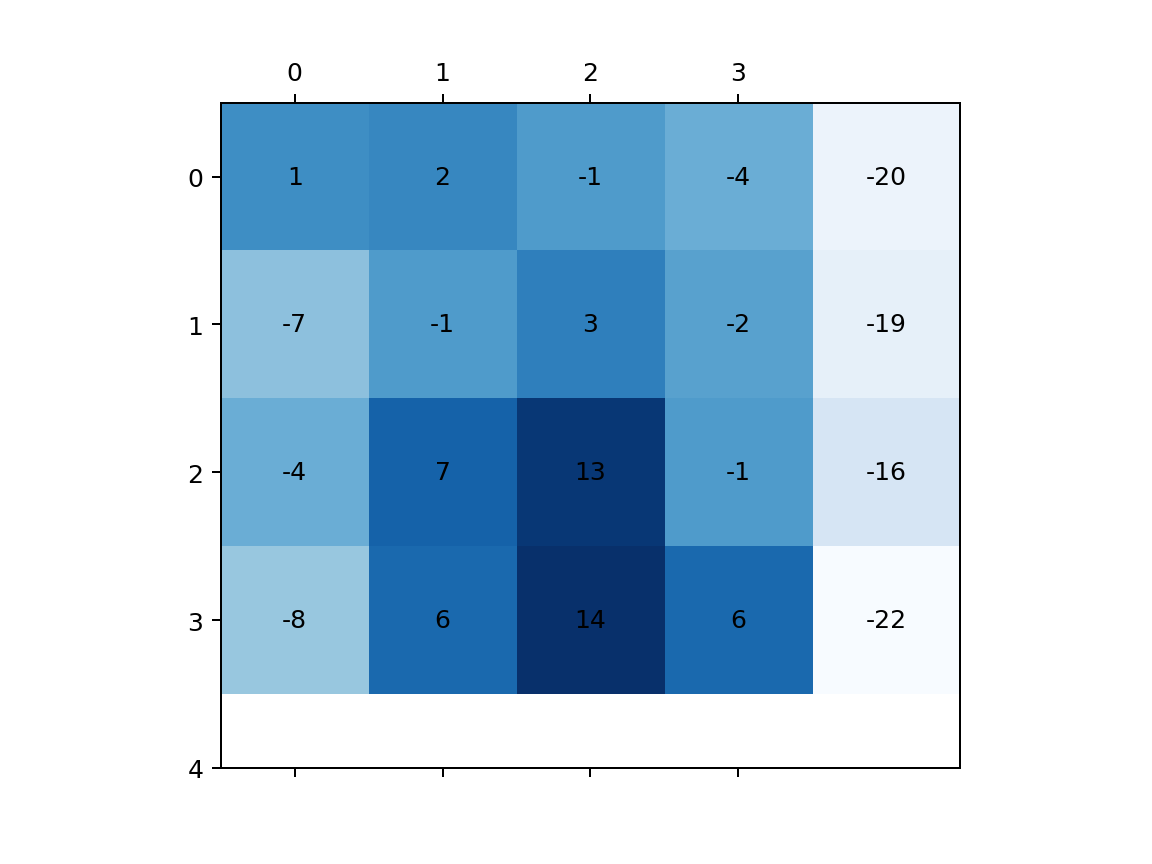

In [53]:
InteractiveArray(test_matrix)

### Problem Odległości Edycyjnej (Edit Distance)

Problem odległości edycyjnej jest klasycznym problemem w teorii ciągów, używanym często w bioinformatyce, wyszukiwaniu tekstowym i wielu innych dziedzinach. Zadanie polega na znalezieniu najmniejszej liczby operacji edycyjnych potrzebnych do przekształcenia jednego ciągu znaków w drugi.

#### Formalna Definicja

Niech $A$ i $B$ będą dwoma ciągami znaków. Odległość edycyjna $D$ między $A$ i $B$ jest zdefiniowana jako minimalna liczba operacji edycyjnych (usuwanie, dodawanie, zamiana znaku), potrzebnych do przekształcenia ciągu $A$ w ciąg $B$.

$$
D(A, B) = \min_{\text{edycje}} \text{liczba operacji}
$$

#### Algorytmy Rozwiązujące Problem

1. Algorytm Brute-Force: Sprawdzenie wszystkich możliwych kombinacji (bardzo czasochłonne).
2. Algorytm Programowania Dynamicznego: Efektywny algorytm działający w czasie $O(n\times m)$, gdzie $n$ i $m$ są długościami ciągów $A$ i $B$.

In [56]:
def edit_distance_rec(word1, word2):
    
    if word1 == "":
        return len(word2)

    if word2 == "":
        return len(word1)
    
    if word1[0] == word2[0]:
        return edit_distance_rec(word1[1:], word2[1:])
    
    
    return 1 + min(
    
        edit_distance_rec(word1[1:], word2), # usuwamy znak z pierwszego słowa
        edit_distance_rec(word1, word2[1:]), # wstawiamy znak na początek pierwszego słowa
        edit_distance_rec(word1[1:], word2[1:]), # podmieniamy znak z pierwszego słowa na znak z drugiego słowa
    
    )

In [57]:
edit_distance_rec("apple", "aplpe")

2

In [72]:
def edit_distance_dp(word1, word2):
    
    len_word1, len_word2 = len(word1), len(word2)
    
    dp = np.zeros((len_word1 + 1, len_word2 + 1), dtype=int)
    
    for i in range(len_word1 + 1):
        dp[i][0] = i
    for j in range(len_word2 + 1):
        dp[0][j] = j
        
    for i in range(1, len_word1 + 1):
        for j in range(1, len_word2 + 1):
            
            del_cost = dp[i-1][j] + 1 # wiersz wyżej, czyli suffix wejściowego słowa krótszy o jeden znak - usuwanie
            ins_cost = dp[i][j-1] + 1 # kolumna w lewo, czyli suffix wyjściowego słowa krótszy o jeden znak - wstawianie
            sub_cost = dp[i-1][j-1] + (0 if word1[i-1] == word2[j-1] else 1) # poruszamy się po obu suffixach - zamiana
            # sprawdzamy też czy znaki się zgadzają. Jeśli tak to robimy "zamianę" znaku na ten sam znak - koszt 0
            
            # Wybieramy minimalny koszt
            dp[i][j] = min(del_cost, ins_cost, sub_cost)
            
            # zamiast return na końcu, zrobimy yield po każdej iteracji. W ten sposób będziemy mogli iterować po wyniku
            # po każdej iteracji
            yield InteractiveArray(dp, xticks=list("_"+ word1), yticks=list("_"+ word2))
            
            ś

In [73]:
iterator = edit_distance_dp("apple", "aplpe")

<IPython.core.display.Javascript object>


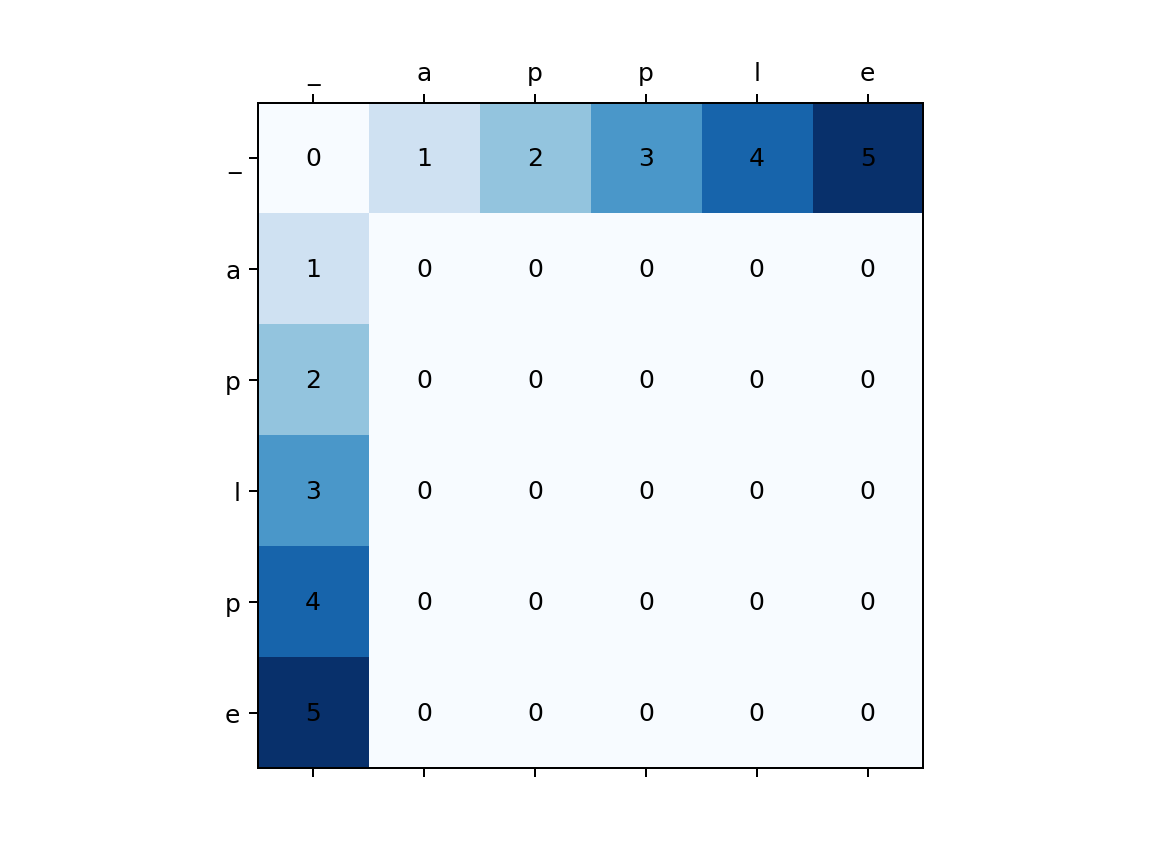

<IPython.core.display.Javascript object>


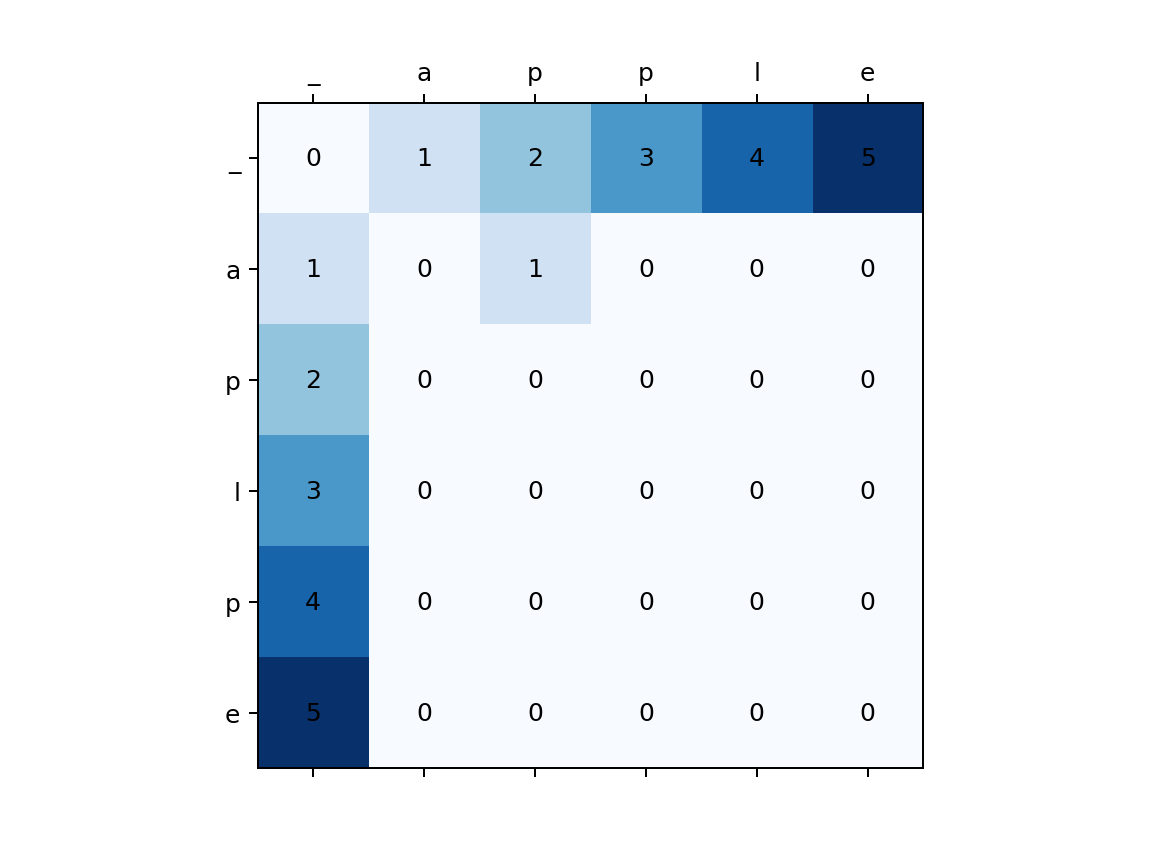

<IPython.core.display.Javascript object>


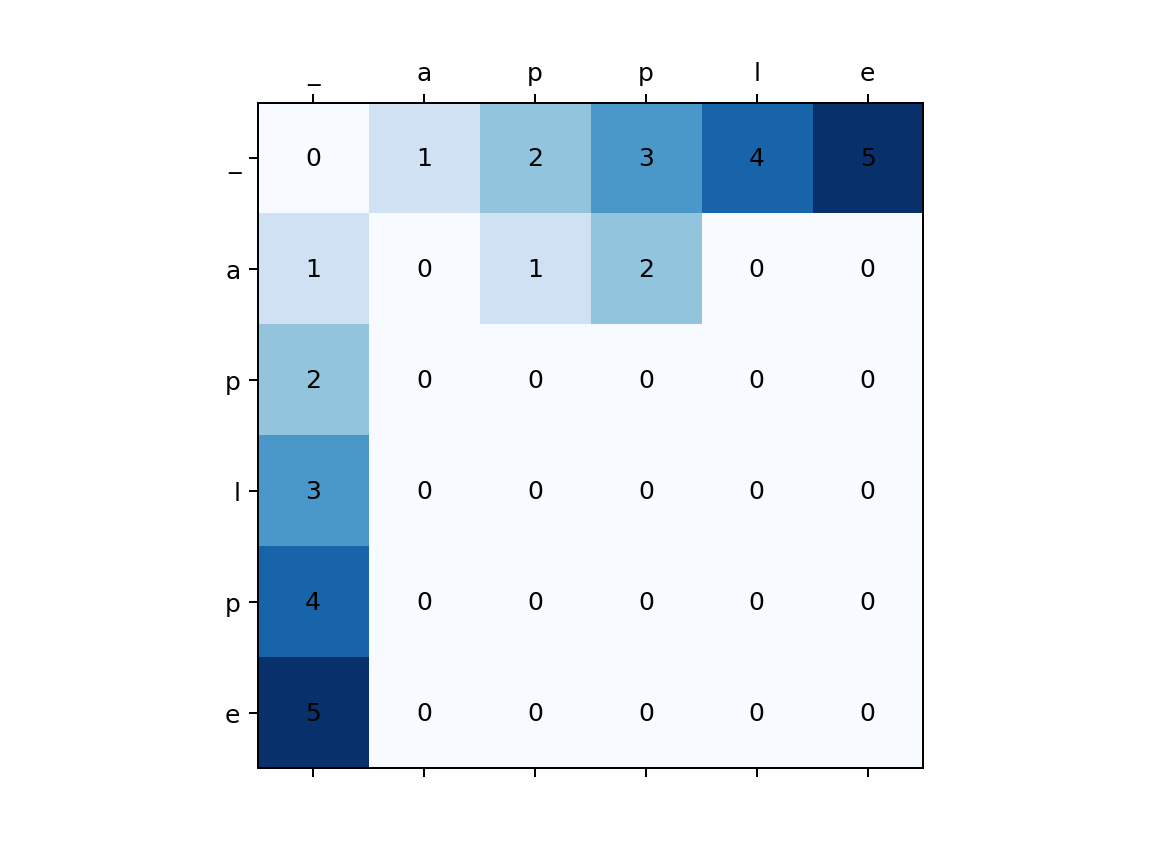

<IPython.core.display.Javascript object>


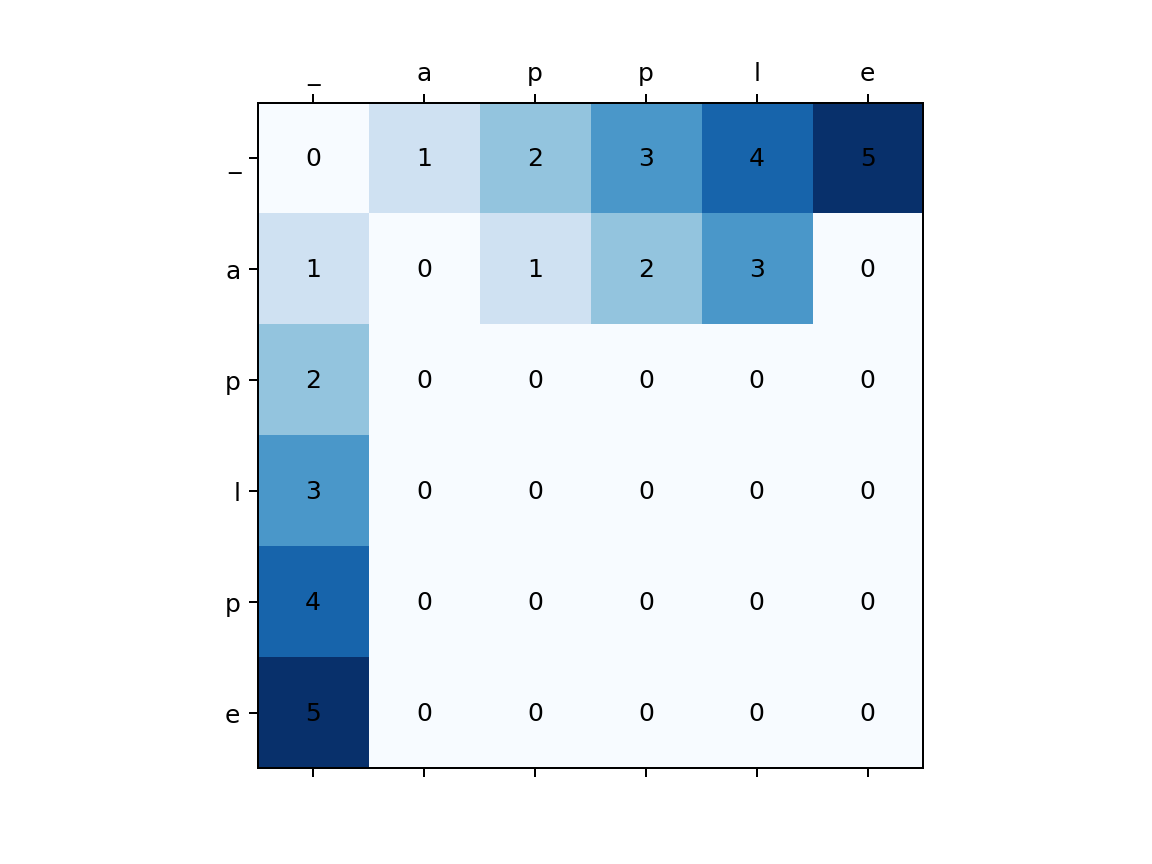

<IPython.core.display.Javascript object>


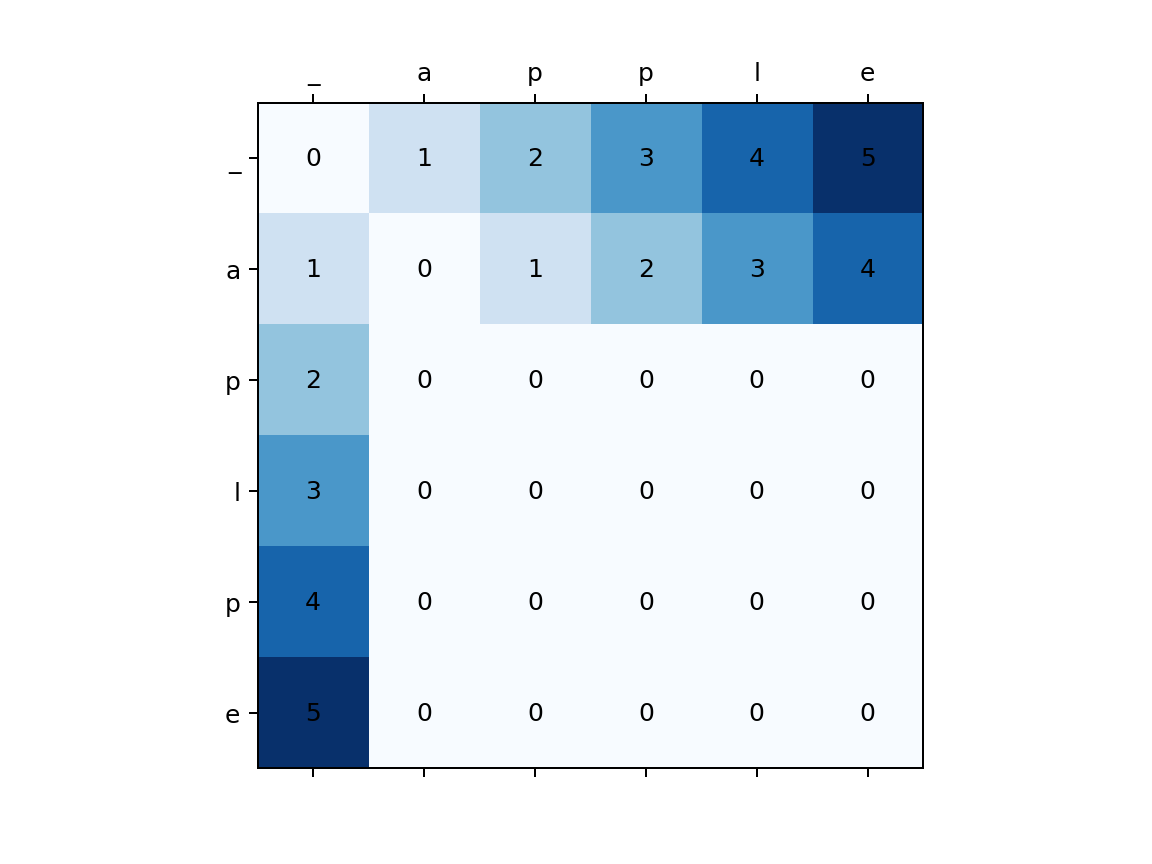

<IPython.core.display.Javascript object>


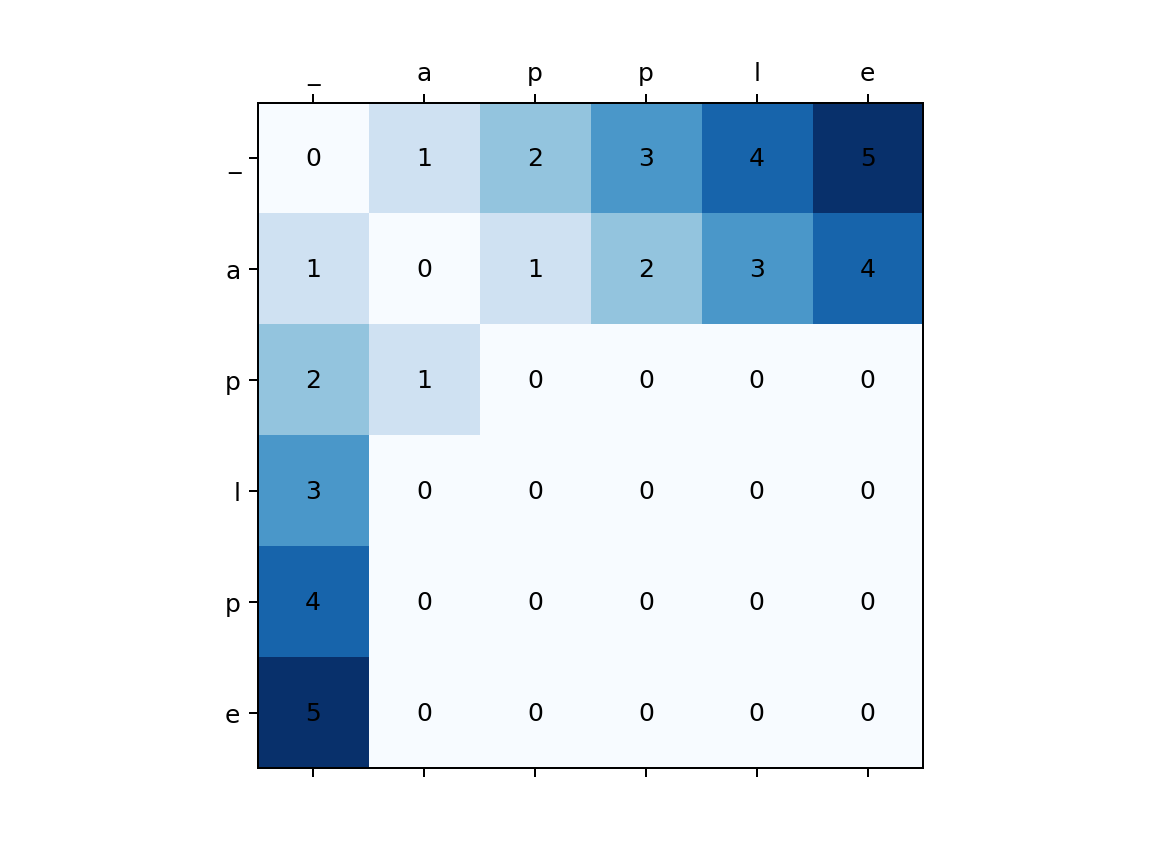

<IPython.core.display.Javascript object>


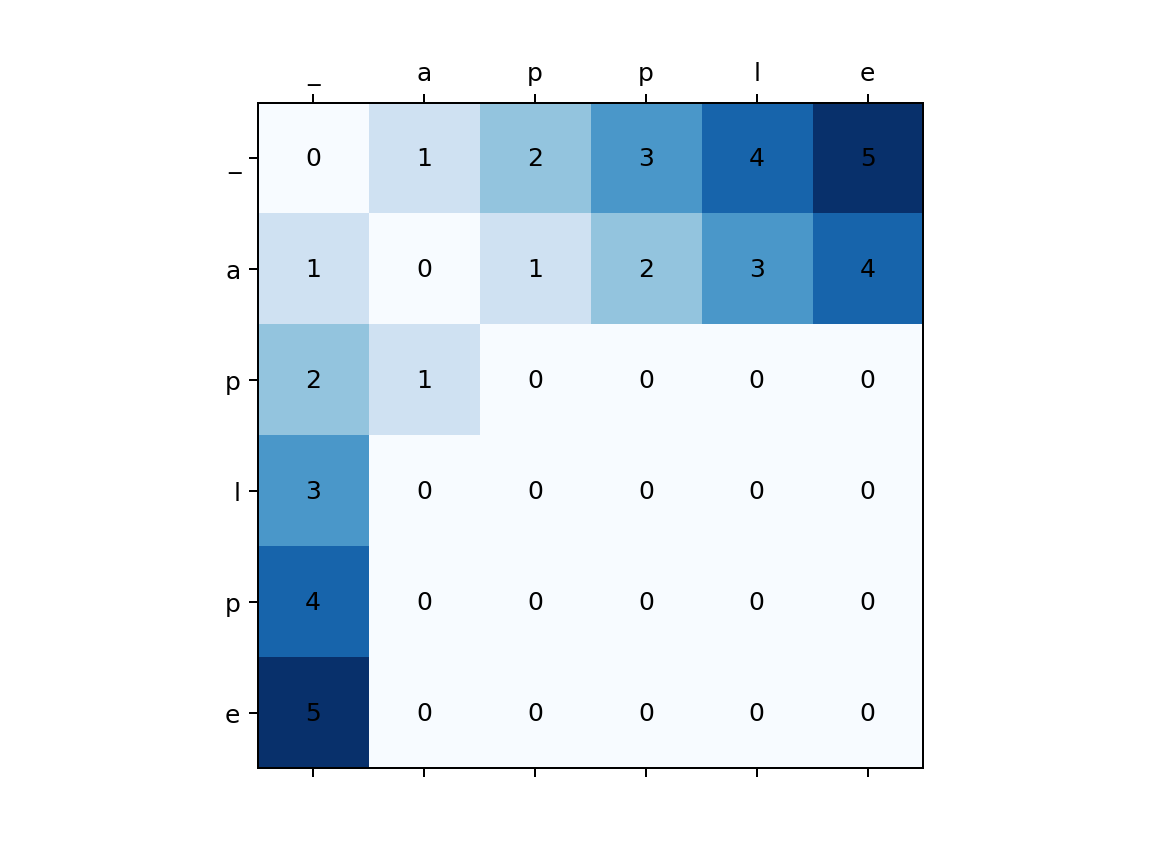

<IPython.core.display.Javascript object>


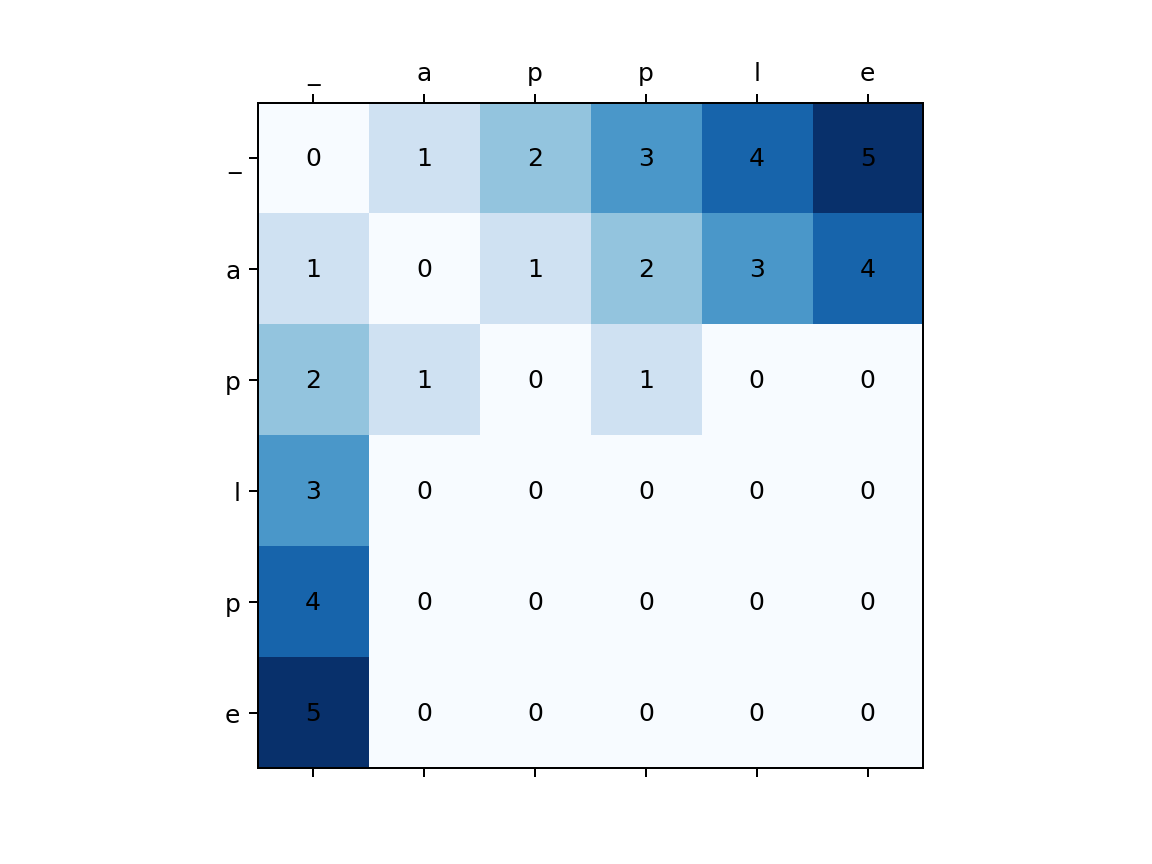

<IPython.core.display.Javascript object>


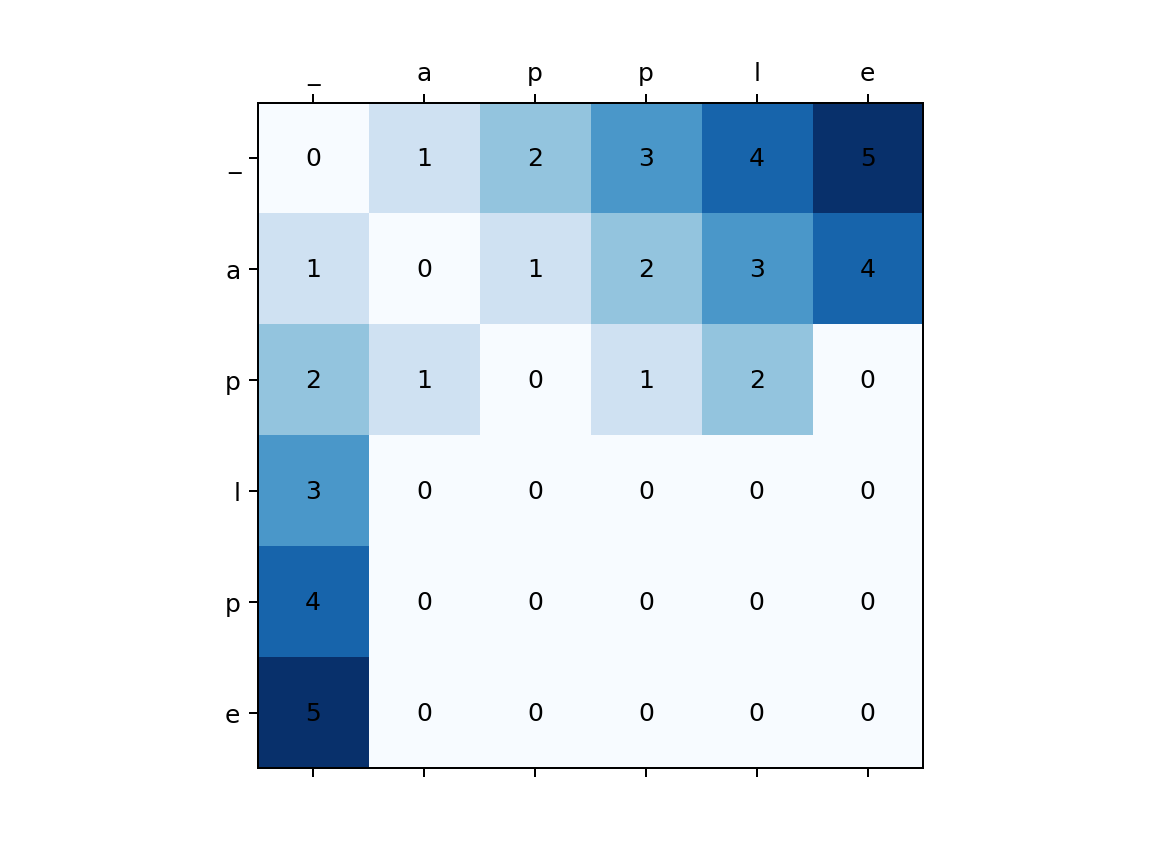

<IPython.core.display.Javascript object>


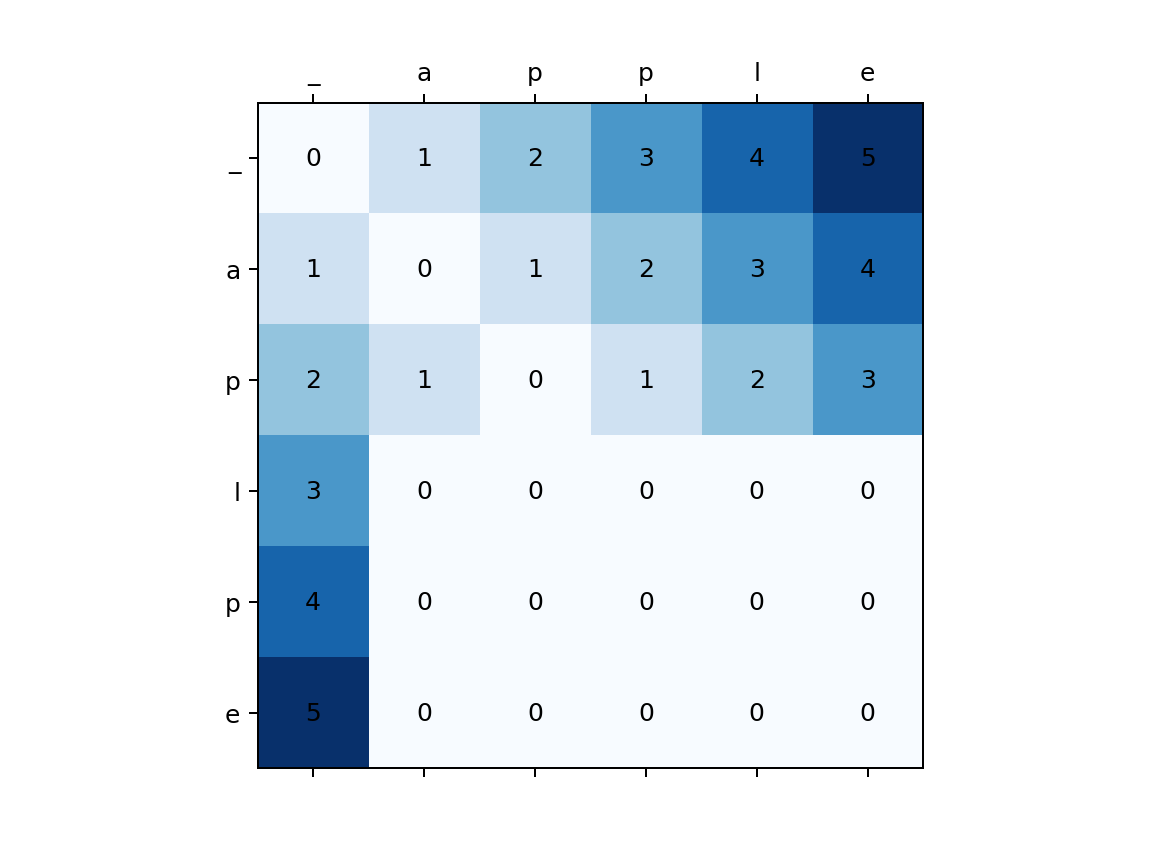

<IPython.core.display.Javascript object>


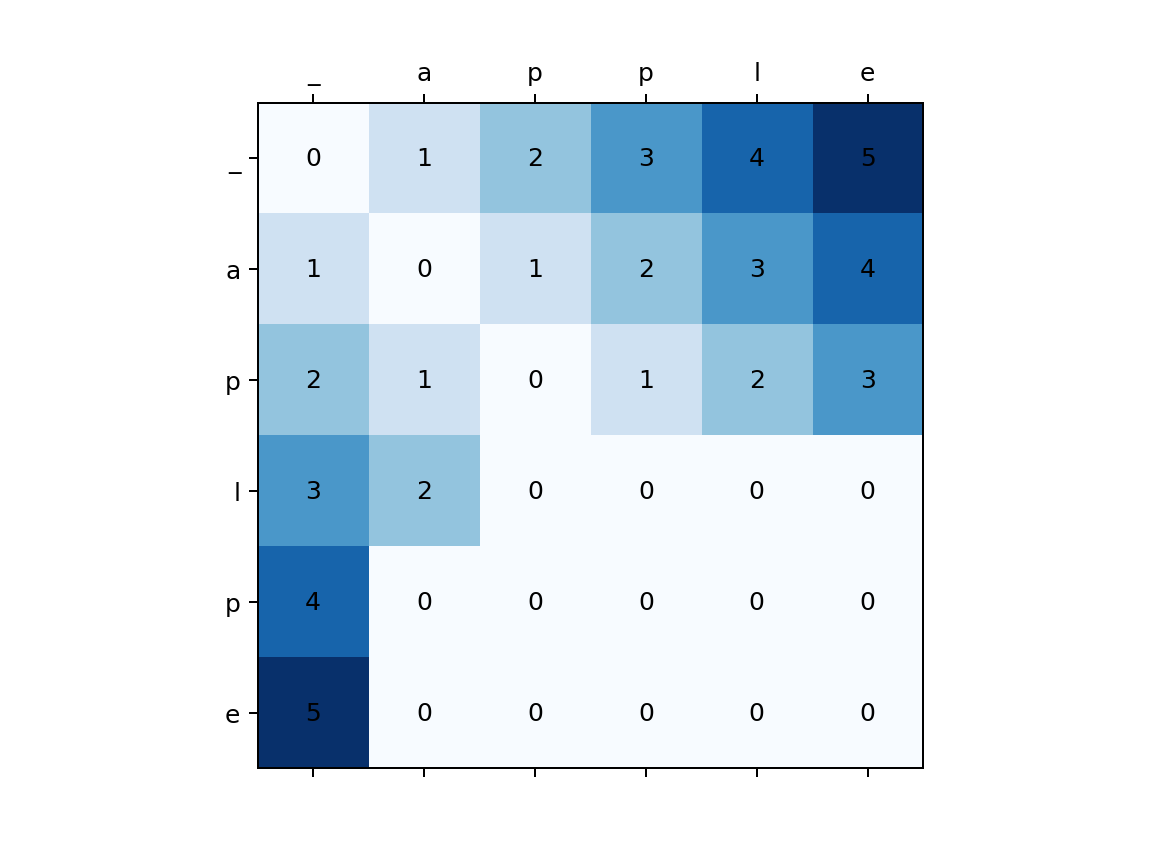

<IPython.core.display.Javascript object>


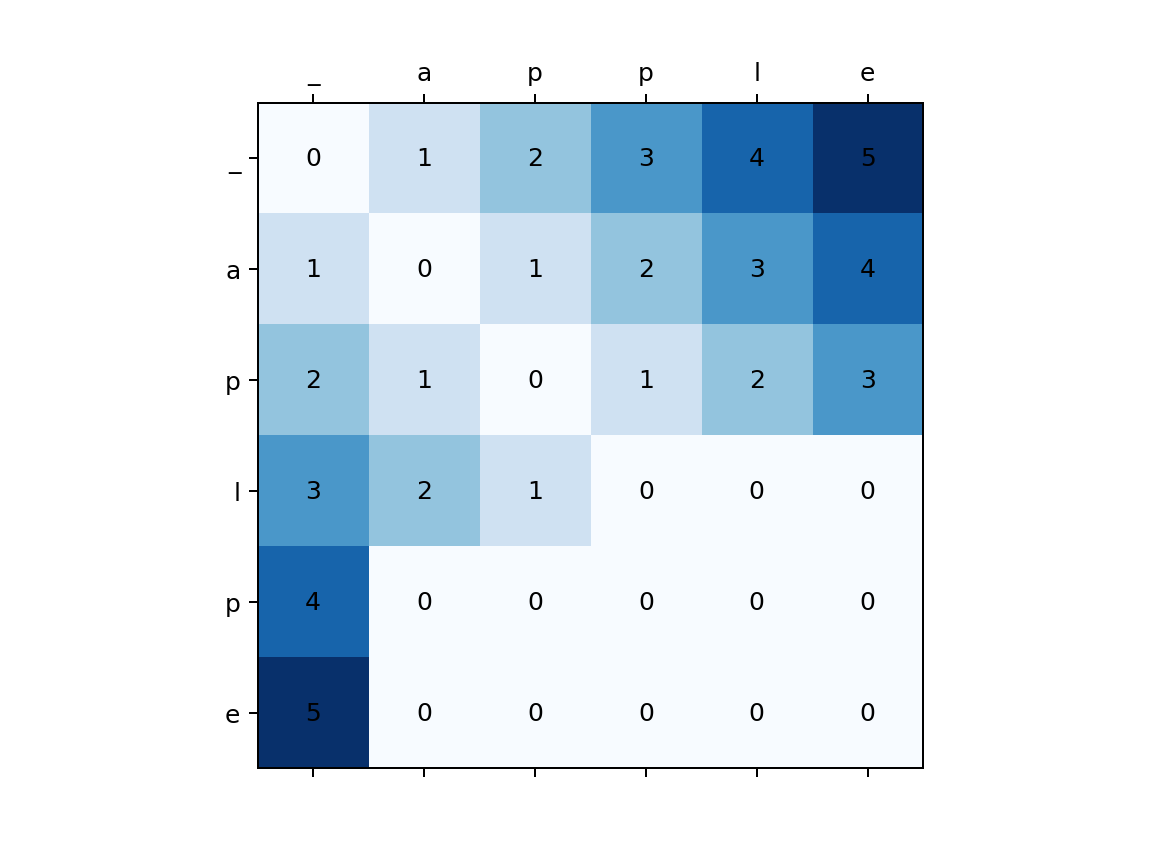

<IPython.core.display.Javascript object>


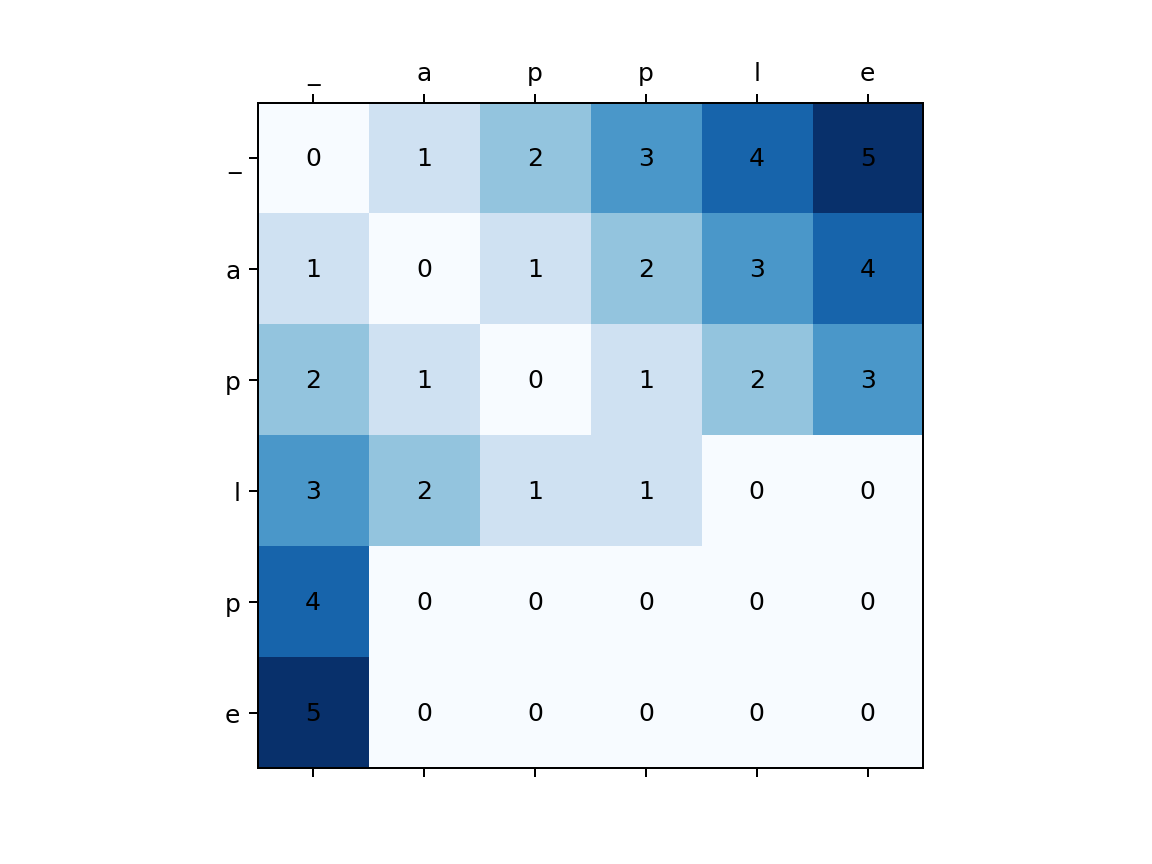

<IPython.core.display.Javascript object>


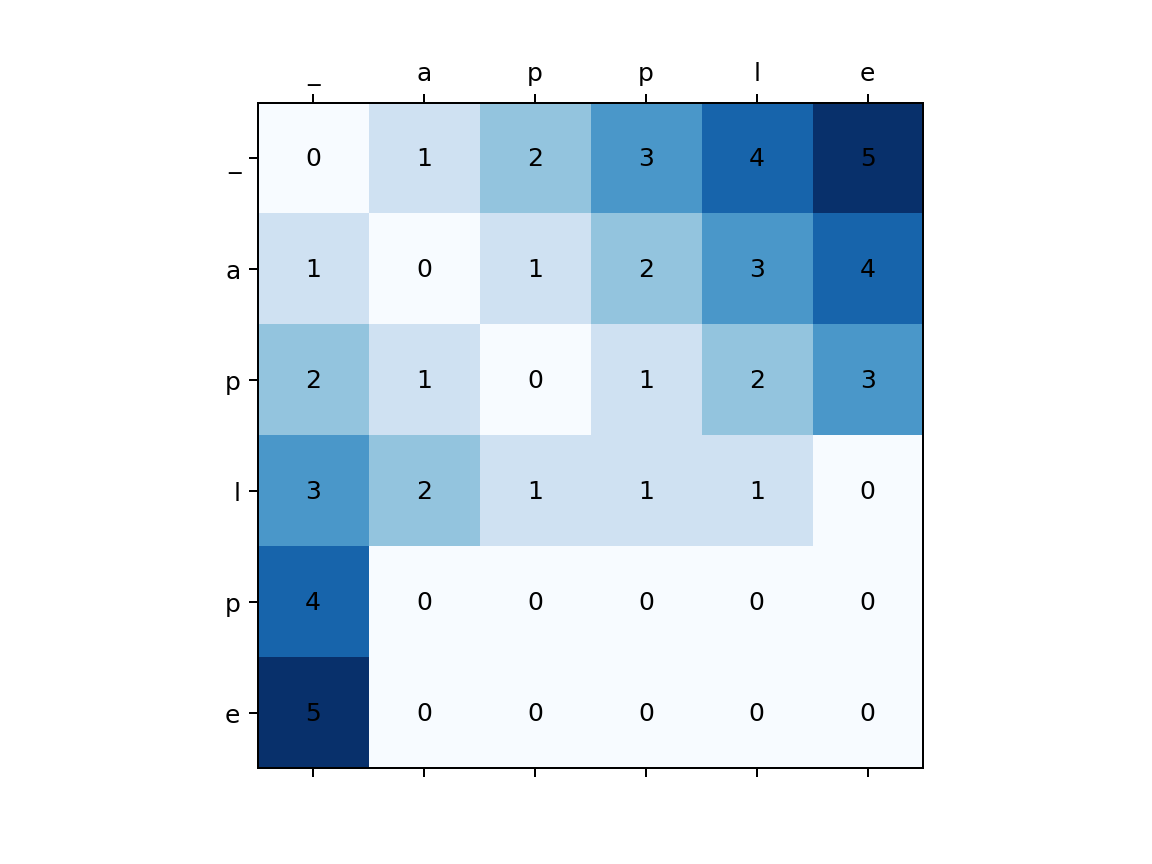

<IPython.core.display.Javascript object>


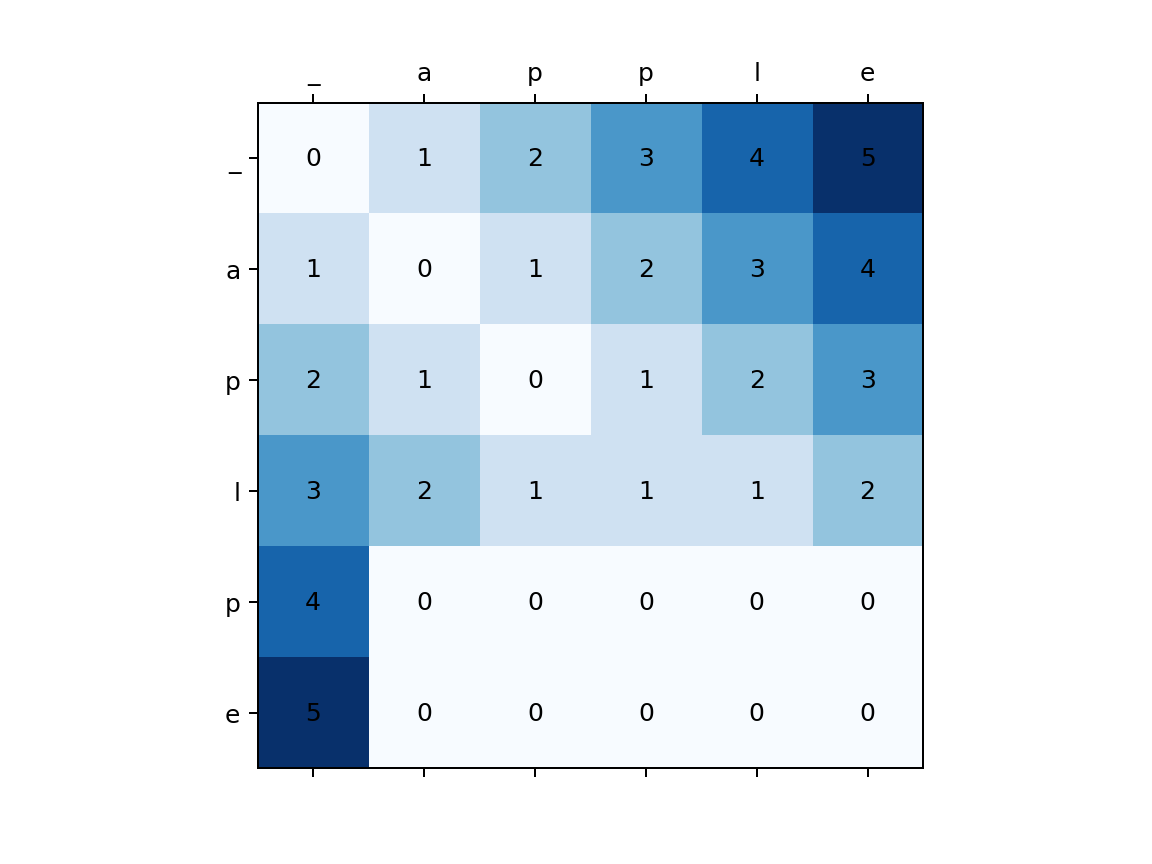

<IPython.core.display.Javascript object>


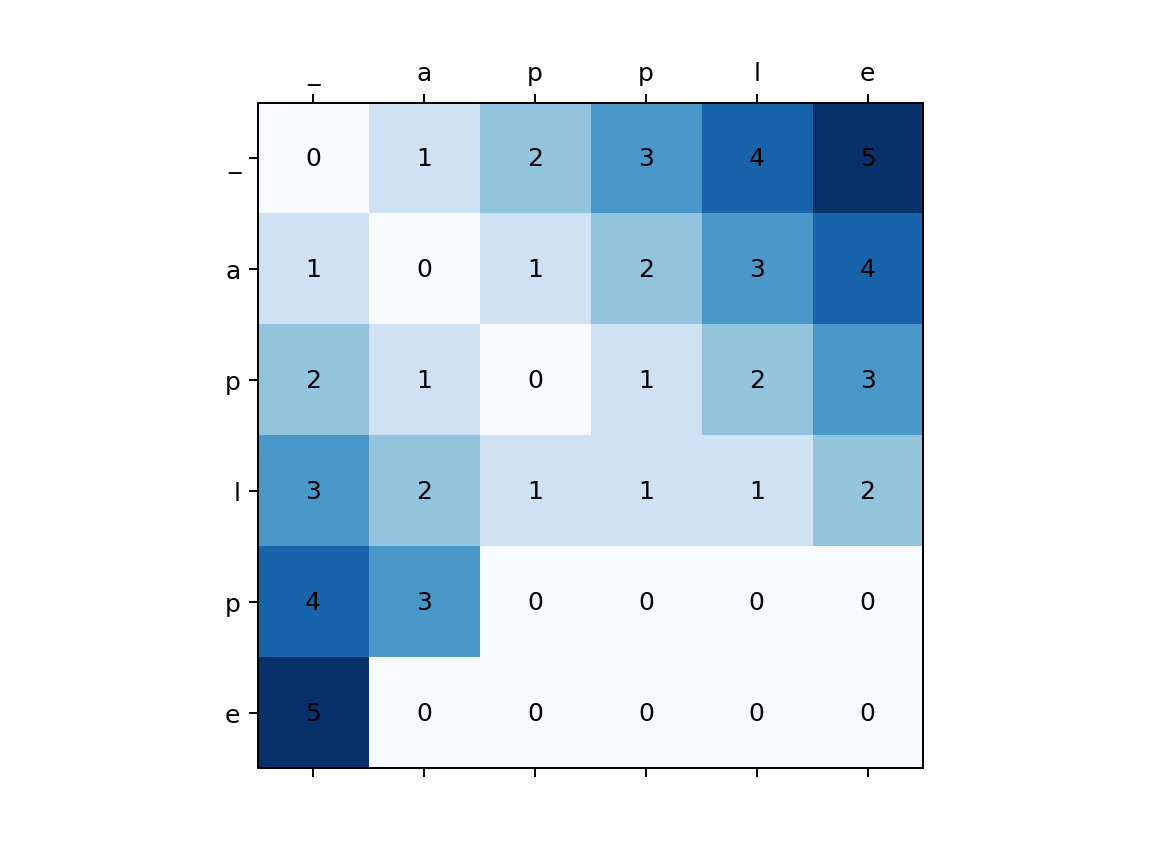

<IPython.core.display.Javascript object>


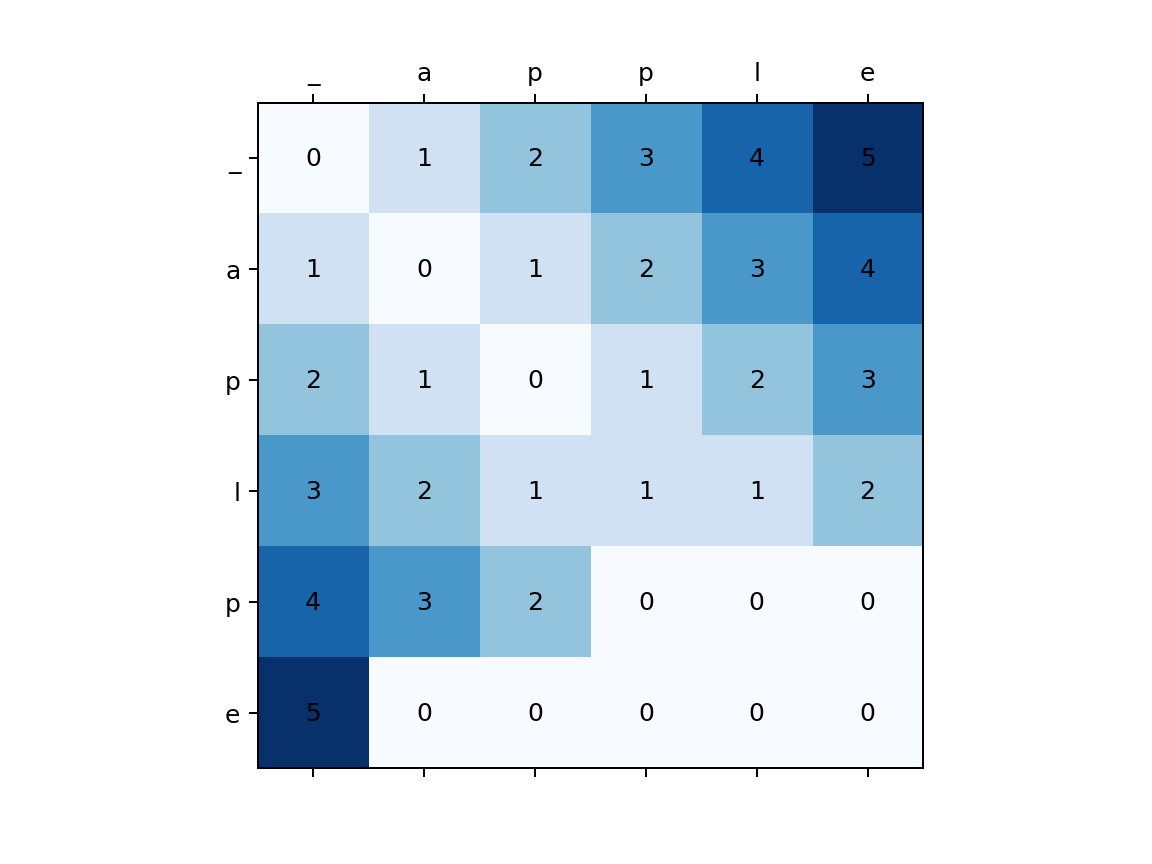

<IPython.core.display.Javascript object>


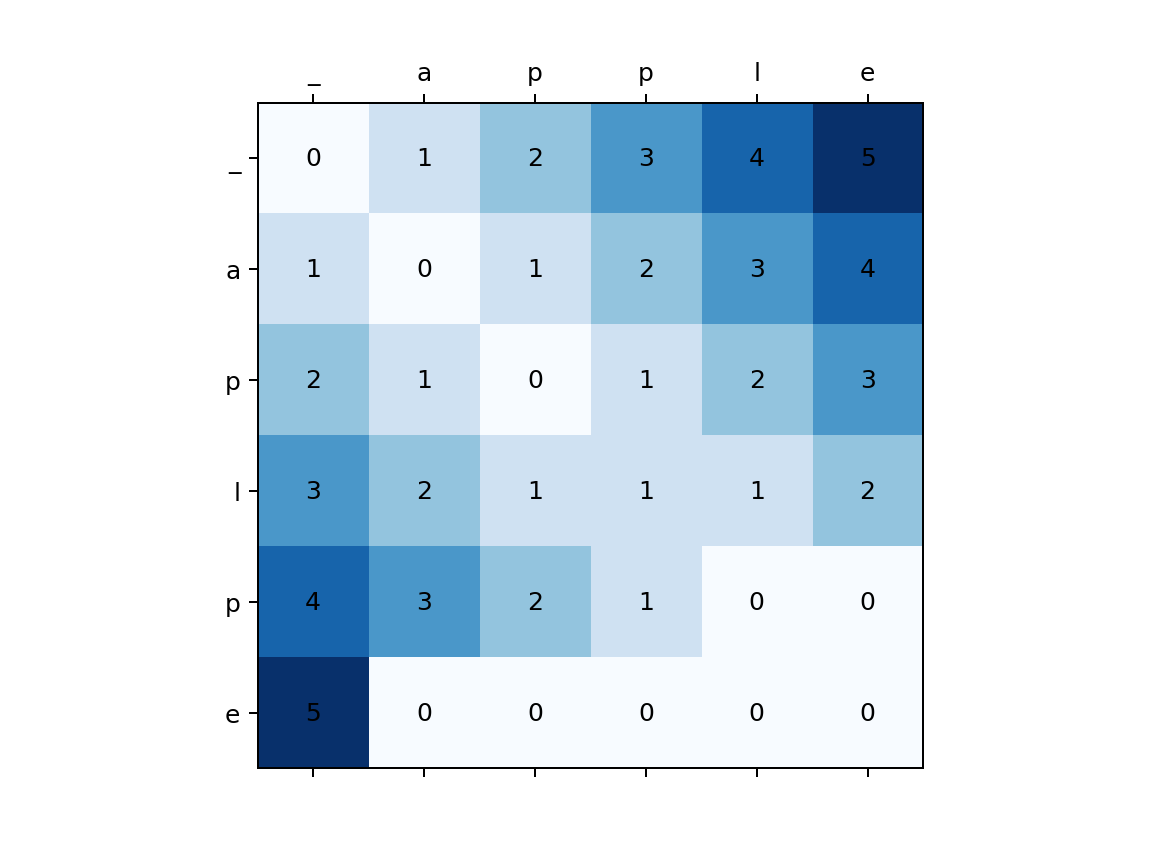

/Users/s/Documents/AiSD/utils.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, self.ax = plt.subplots()


<IPython.core.display.Javascript object>


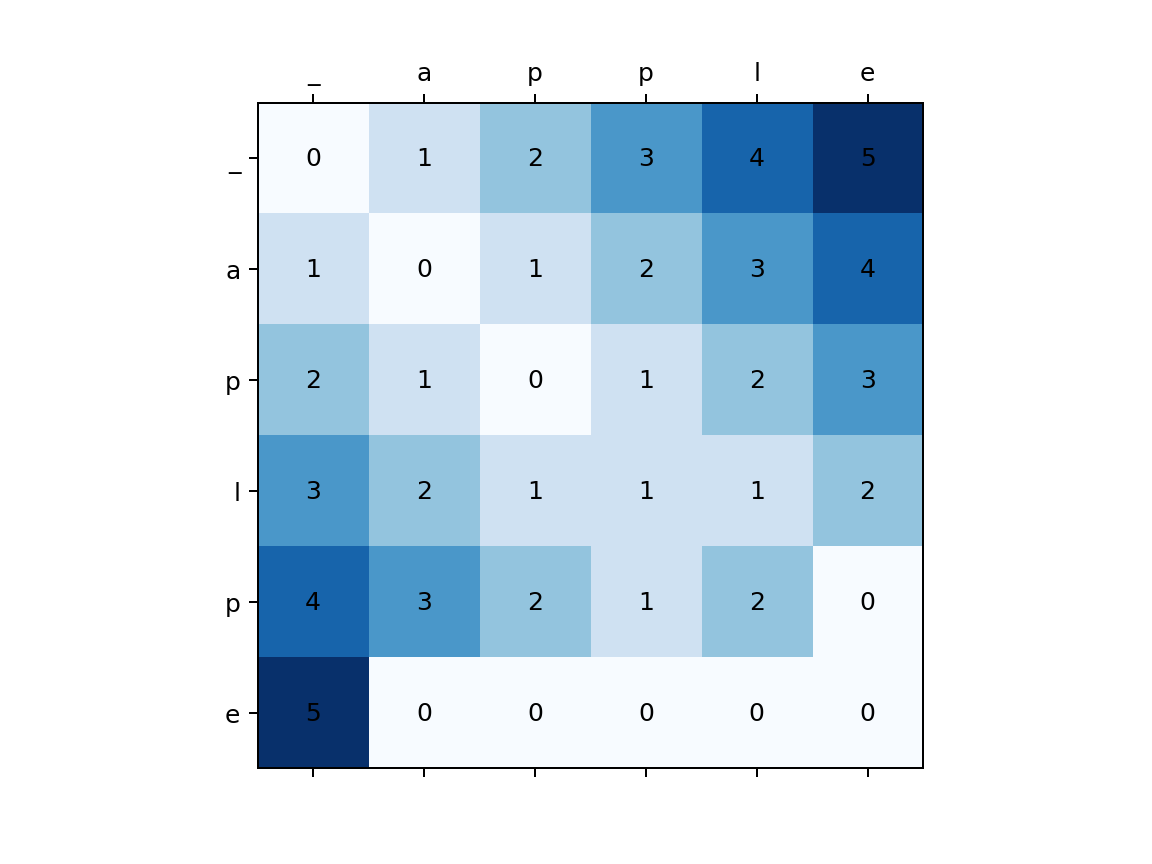

<IPython.core.display.Javascript object>


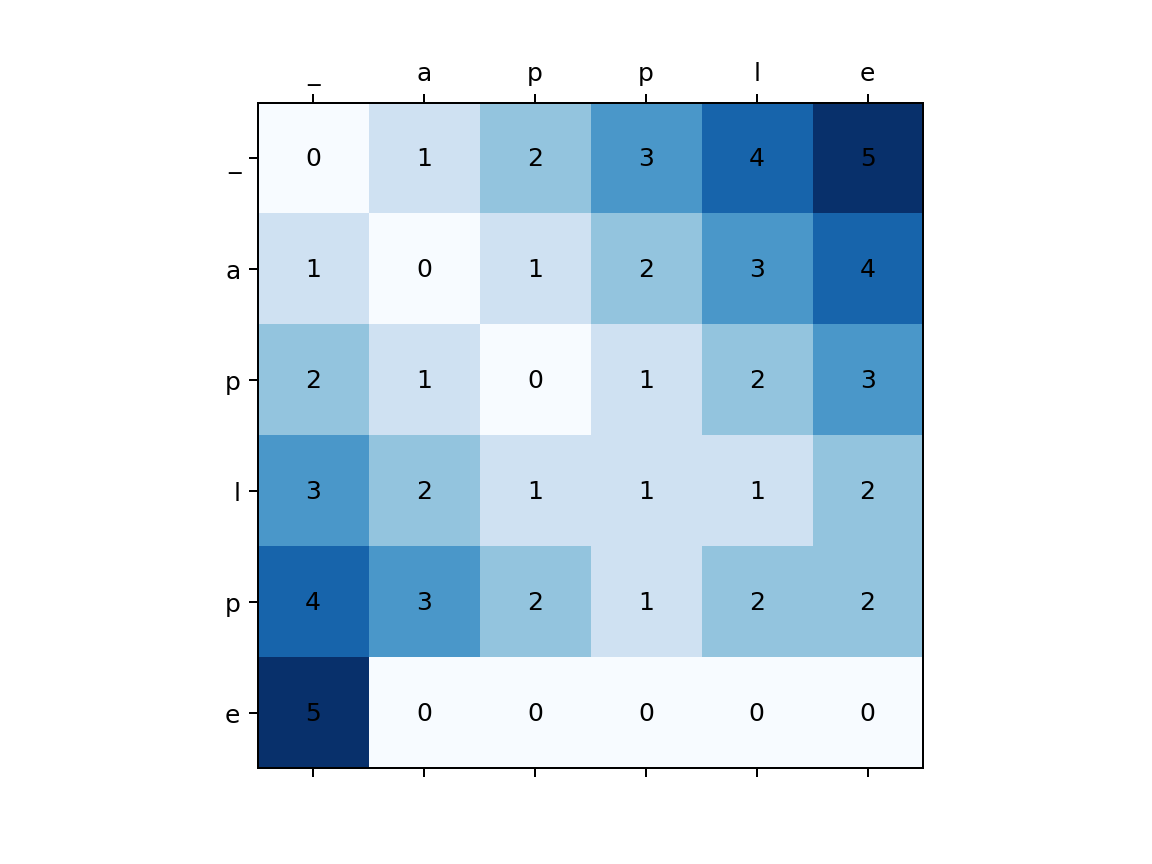

<IPython.core.display.Javascript object>


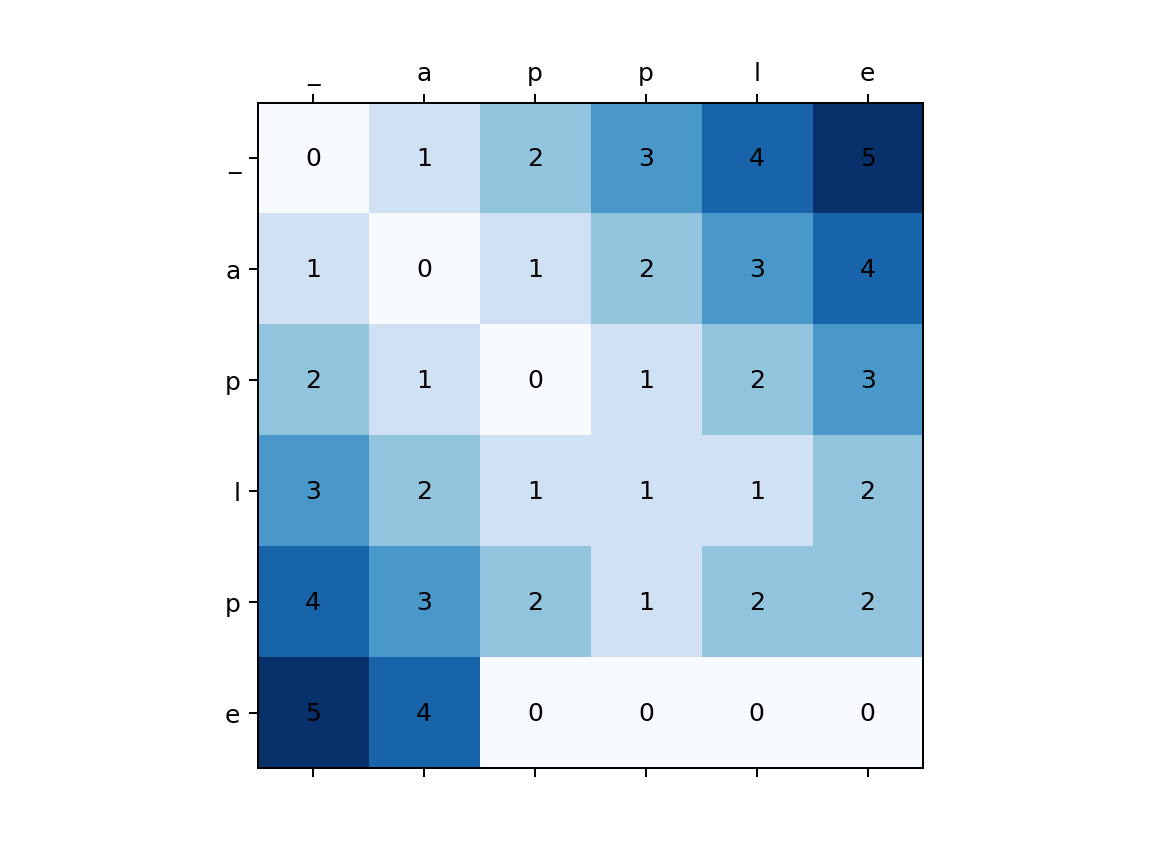

<IPython.core.display.Javascript object>


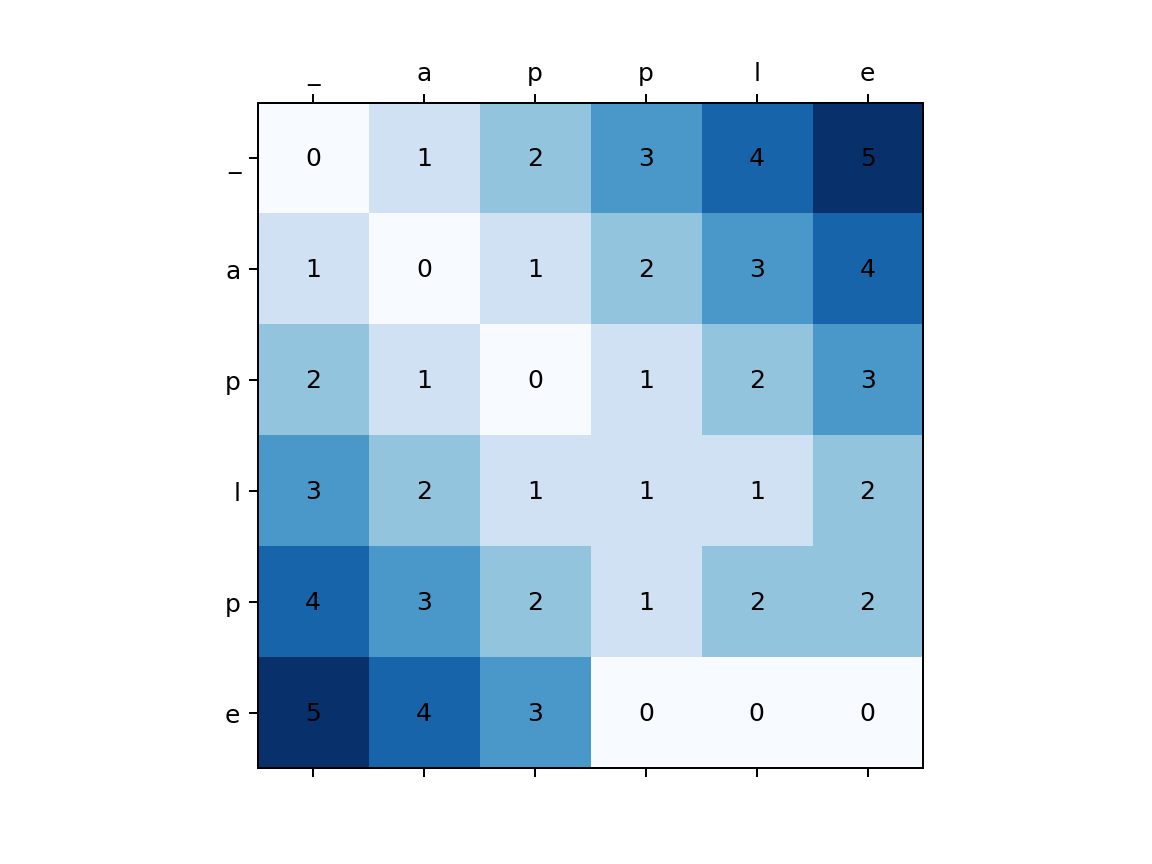

<IPython.core.display.Javascript object>


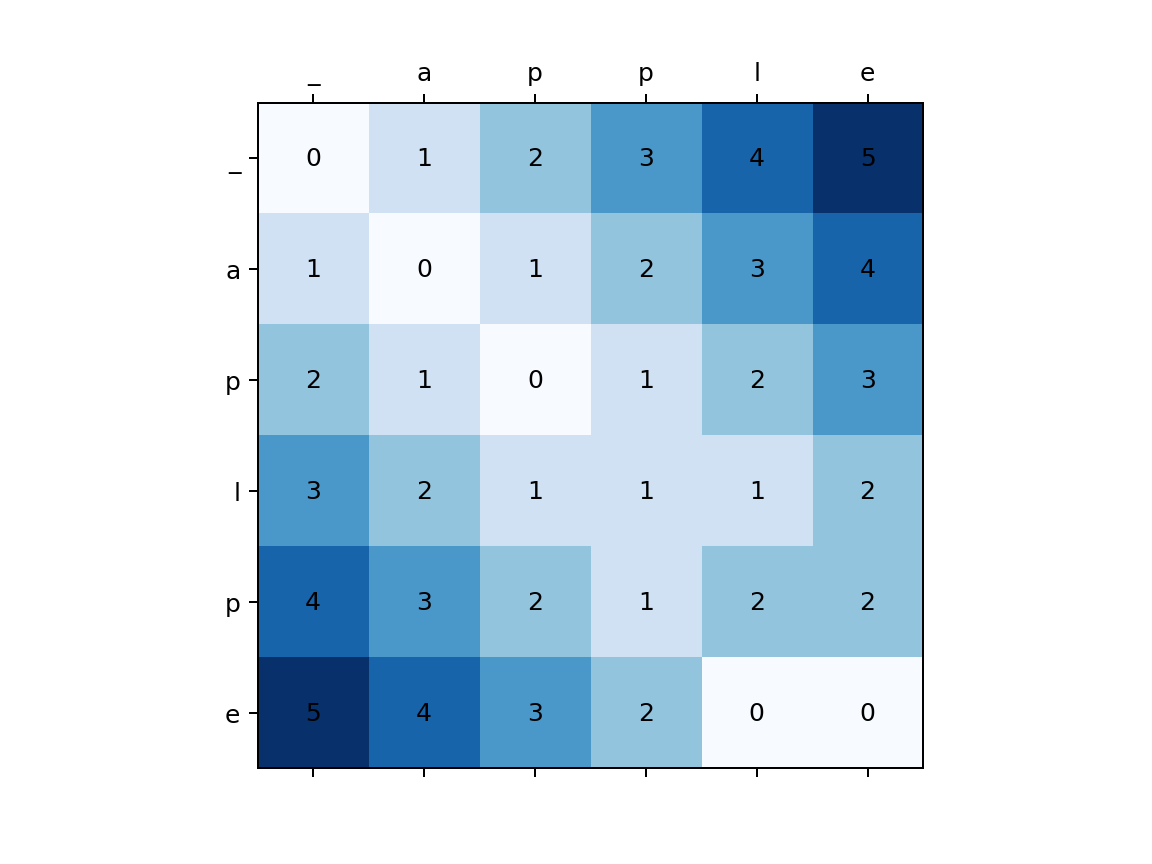

<IPython.core.display.Javascript object>


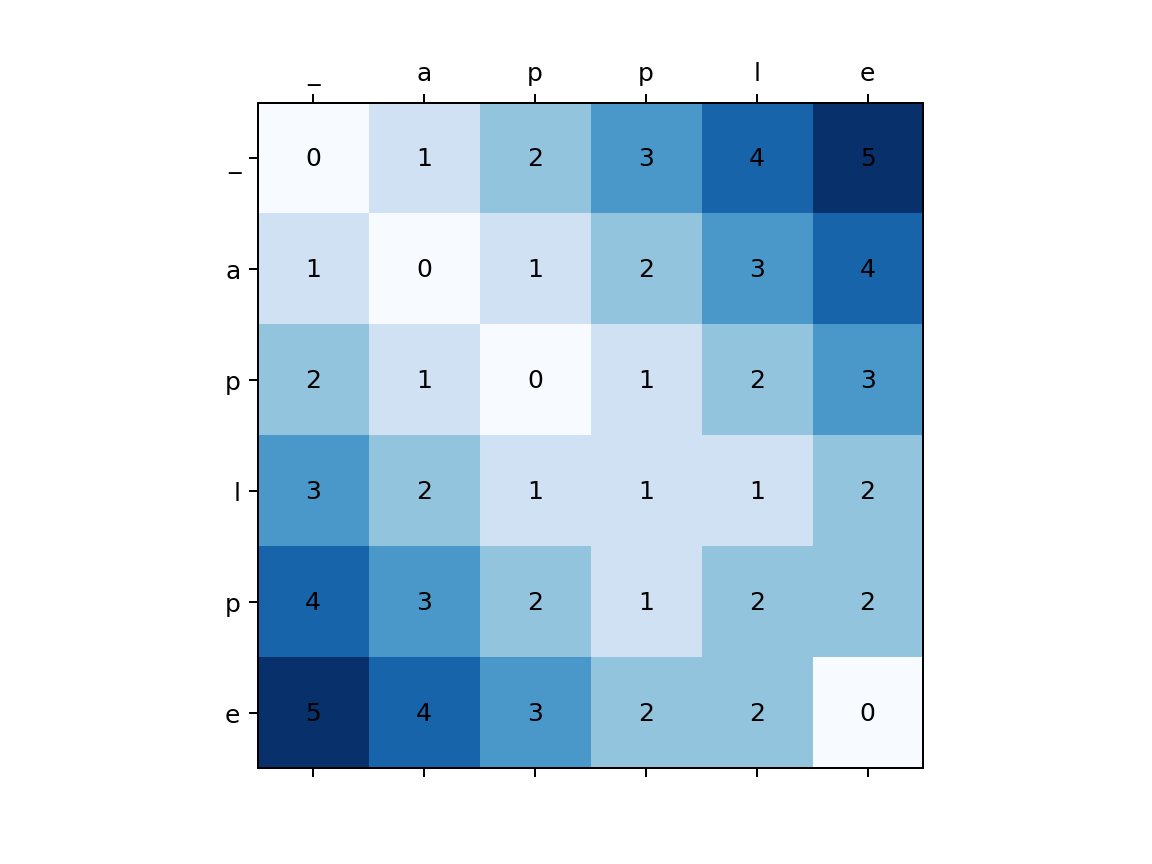

<IPython.core.display.Javascript object>


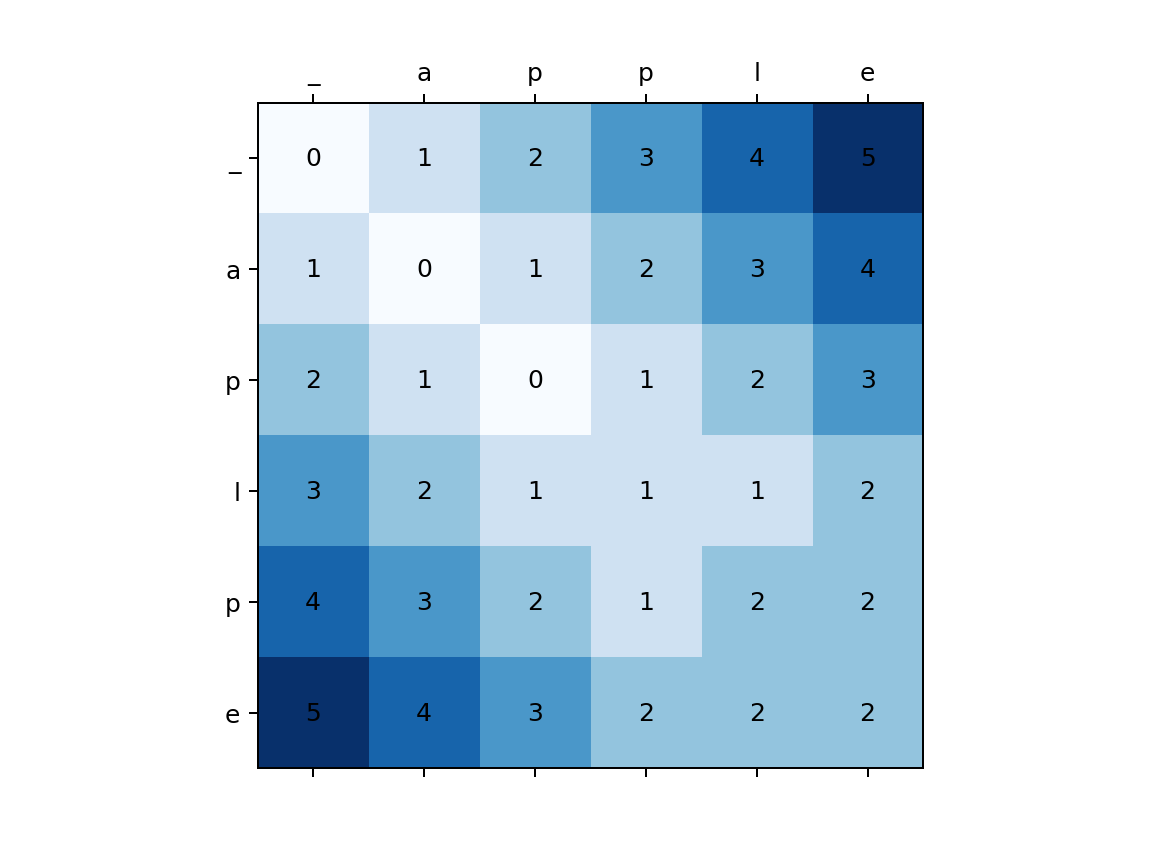

In [74]:
for current_iteration_array in iterator:
    
    current_iteration_array.display(clear=False)